<a href="https://colab.research.google.com/github/GUNDRUNIKHITHA/calories_burnt_prediction-ML/blob/main/calories_burnt_prediction-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [2]:
# 1. Reading data from CSV
def read_csv(file_path):
    """
    Read data from a CSV file and return a pandas DataFrame.

    Parameters:
    - file_path: str, the path to the CSV file.

    Returns:
    - pd.DataFrame, the loaded DataFrame.
    """
    return pd.read_csv(file_path)
#2. Getting information and statistics about over dataset
def dataset_info_statistics(data):
    """
    Display information and basic statistics about the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - None
    """
    # Display general information about the dataset
    print("Dataset Information:")
    print(data.info())
    print("\n")

    # Display basic statistics for numerical columns
    print("Basic Statistics for Numerical Columns:")
    print(data.describe())
    print("\n")

#3.check for the null values in the dataset
def check_null(data):
    """
    Check for null values in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - pd.Series, the count of null values for each column.
    """
    null_counts = data.isnull().sum()
    print("Null Values in the Dataset:")
    return null_counts

#4.check for duplicated rows in the dataset
def check_duplicates(data):
    """
    Check for duplicated rows in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - bool, True if any duplicated rows exist, False otherwise.
    """
    return data.duplicated().any()

#5. getting basic analysis for numerical and categorical columns
def plot_graph(data):
    """
    Plot graphs for numerical and categorical data in a dataframe.

    Parameters:
    - data: Pandas Dataframe, input data.

    Returns:
    - None

    """
    numerical_columns = data.select_dtypes(include=np.number).columns

    for column in numerical_columns:
        plt.figure(figsize=(5,3))
        sns.distplot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    categorical_columns = data.select_dtypes(include='object').columns
    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(data[column])
        plt.title(f'Countplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

#6. Seperate feature and target
def seperate_features_target(data,target_column):
    """
    Separate features and target variable

    Parameters:
    - data: pandas DataFrame, input data.
    - target_column: str, the column representing the target varible.

    Returns:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.

    """

    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]

    return X,y
#7. Train test split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    """
    Perform train-test split on the dataset.

    Parameters:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    - test_size: float, optional, the proportion of the dataset to include in the test split (default is 0.2).
    - random_state: int or None, optional, seed for random number generation (default is None).

    Returns:
    - X_train: pandas DataFrame, features for training.
    - X_test: pandas DataFrame, features for testing.
    - y_train: pandas Series, target variable for training.
    - y_test: pandas Series, target variable for testing.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [3]:
calories = read_csv('calories.csv')
exercise = read_csv('exercise.csv')


In [4]:
data = pd.merge(calories, exercise, on='User_ID')
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
dataset_info_statistics(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


Basic Statistics for Numerical Columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [6]:
check_null(data)

Null Values in the Dataset:


,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


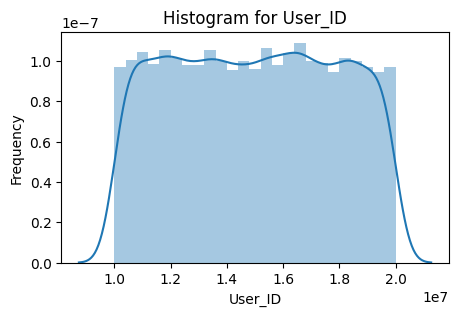

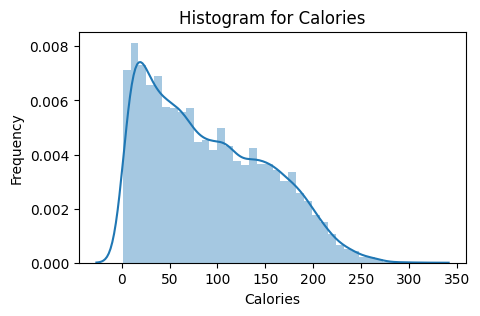

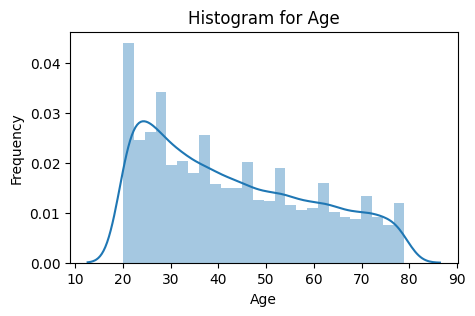

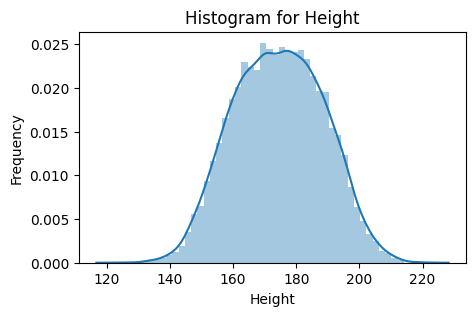

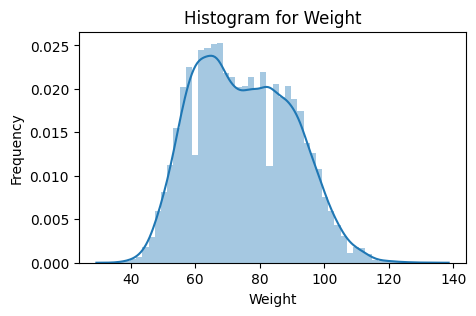

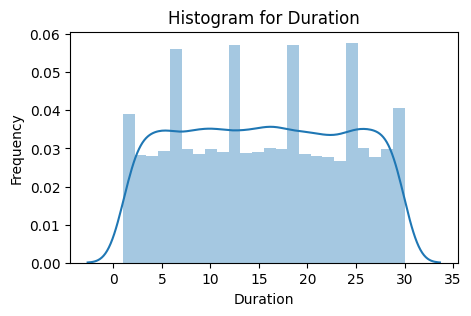

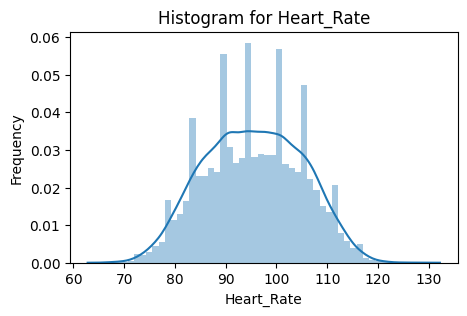

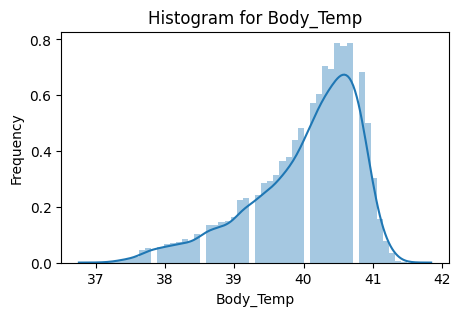

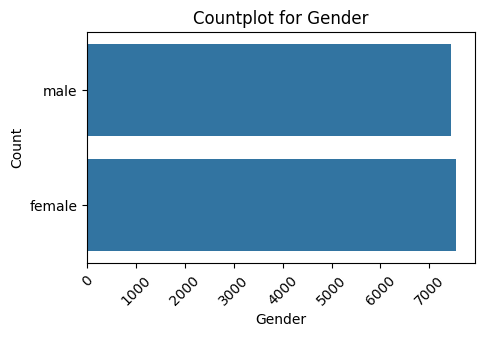

In [7]:
plot_graph(data)

In [8]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [9]:
X,y = seperate_features_target(data,'Calories')
X = X.drop(columns=['User_ID'])
X_train,X_test,y_train,y_test = perform_train_test_split(X, y, test_size=0.20, random_state=42)

**Column Transformer and Pipeline**

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
],remainder='passthrough')

In [11]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())
                    ])

In [12]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [13]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [15]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9672937151257295

In [16]:

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
cv_results.mean()

0.9671402283675841

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

8.441513553849704

In [18]:
def model_scorer(model_name,model):

    output=[]


    output.append(model_name)

    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())

    return output

In [19]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))
model_output

[['log', 0.9672937151257295, 8.441513553849704, 0.9671402283675841],
 ['RF', 0.998271474652284, 1.6886266666666667, 0.9979322253195406],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [20]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),

],remainder='passthrough')
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())

])
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [21]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])
pipeline.predict(sample)

array([231.0721], dtype=float32)

In [22]:
import pickle
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)
result = pipeline_saved.predict(sample)
result

array([231.0721], dtype=float32)